In [1]:
from sklearn import preprocessing
import numpy as np

features = np.array([[-100.1, 3240.1],[-200.2, -234.1],[5000.5, 150.1],[600.6,150.1],[9000.9, -673.1]])
scaler = preprocessing.StandardScaler()

features_standardized = scaler.fit_transform(features)

features_standardized

array([[-0.81778677,  1.9517367 ],
       [-0.84543822, -0.54716642],
       [ 0.59119406, -0.2708212 ],
       [-0.62422663, -0.2708212 ],
       [ 1.69625756, -0.86292788]])

In [3]:
from keras import models
from keras import layers

network = models.Sequential()

network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))

network.add(layers.Dense(units=16, activation="relu"))

network.add(layers.Dense(units=1, activation="sigmoid"))

network.compile(loss="binary_crossentropy",
               optimizer="rmsprop",
               metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

np.random.seed(0)

number_of_features = 1000

(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode='binary')
features_test = tokenizer.sequences_to_matrix(data_test, mode='binary')

network = models.Sequential()

network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

network.add(layers.Dense(units=16, activation="relu"))

network.add(layers.Dense(units=1, activation="sigmoid"))

network.compile(loss="binary_crossentropy",
               optimizer="rmsprop",
               metrics=["accuracy"])

history = network.fit(features_train,
                     target_train,
                     epochs = 3,
                     verbose=1,
                     batch_size=100,
                     validation_data=(features_test, target_test))

Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 1s 32us/step - loss: 0.4159 - acc: 0.8136 - val_loss: 0.3346 - val_acc: 0.8589
Epoch 2/3
25000/25000 [==============================] - 1s 22us/step - loss: 0.3246 - acc: 0.8641 - val_loss: 0.3288 - val_acc: 0.8604
Epoch 3/3
25000/25000 [==============================] - 1s 23us/step - loss: 0.3149 - acc: 0.8664 - val_loss: 0.3302 - val_acc: 0.8593


In [11]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical

np.random.seed(0)

number_of_features = 5000

(data_train, target_vector_train), (data_test, target_vector_test) = reuters.load_data(num_words=number_of_features)

tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode='binary')
features_test = tokenizer.sequences_to_matrix(data_test, mode='binary')

target_train = to_categorical(target_vector_train)
target_test = to_categorical(target_vector_test)

network = models.Sequential()

network.add(layers.Dense(units=100, activation='relu', input_shape=(number_of_features,)))

network.add(layers.Dense(units=100, activation="relu"))

network.add(layers.Dense(units=46, activation="softmax"))

network.compile(loss="categorical_crossentropy",
               optimizer="rmsprop",
               metrics=["accuracy"])

history = network.fit(features_train,
                     target_train,
                     epochs = 3,
                     verbose=1,
                     batch_size=100,
                     validation_data=(features_test, target_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/3
8982/8982 [==============================] - 2s 173us/step - loss: 1.5621 - acc: 0.6653 - val_loss: 1.1439 - val_acc: 0.7395
Epoch 2/3
8982/8982 [==============================] - 1s 150us/step - loss: 0.8139 - acc: 0.8177 - val_loss: 0.9451 - val_acc: 0.7854
Epoch 3/3
8982/8982 [==============================] - 1s 152us/step - loss: 0.5240 - acc: 0.8845 - val_loss: 0.8896 - val_acc: 0.7979


In [16]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

np.random.seed(0)

features, target = make_regression(n_samples=10000,
                                  n_features=3,
                                  n_informative=3,
                                  n_targets=1,
                                  noise = 0.0,
                                  random_state= 0)

features_train,features_test,target_train,target_test = train_test_split(features, target, test_size=0.33, random_state=0)

network = models.Sequential()

network.add(layers.Dense(units=32,
                        activation="relu",
                        input_shape=(features_train.shape[1],)))

network.add(layers.Dense(units=32, activation="relu"))

network.add(layers.Dense(units=1))

network.compile(loss="mse",
               optimizer="RMSprop",
               metrics=["mse"])

history = network.fit(features_train,
                     target_train,
                     epochs = 10,
                     verbose=1,
                     batch_size=100,
                     validation_data=(features_test, target_test))

Train on 6700 samples, validate on 3300 samples
Epoch 1/10
6700/6700 [==============================] - 0s 44us/step - loss: 17306.1837 - mean_squared_error: 17306.1837 - val_loss: 17643.3894 - val_mean_squared_error: 17643.3894
Epoch 2/10
6700/6700 [==============================] - 0s 10us/step - loss: 16438.3378 - mean_squared_error: 16438.3378 - val_loss: 16405.3188 - val_mean_squared_error: 16405.3188
Epoch 3/10
6700/6700 [==============================] - 0s 11us/step - loss: 14833.4596 - mean_squared_error: 14833.4596 - val_loss: 14326.0805 - val_mean_squared_error: 14326.0805
Epoch 4/10
6700/6700 [==============================] - 0s 10us/step - loss: 12444.8769 - mean_squared_error: 12444.8769 - val_loss: 11422.5545 - val_mean_squared_error: 11422.5545
Epoch 5/10
6700/6700 [==============================] - 0s 11us/step - loss: 9276.6831 - mean_squared_error: 9276.6831 - val_loss: 7908.2119 - val_mean_squared_error: 7908.2119
Epoch 6/10
6700/6700 [=============================

In [25]:
from keras import regularizers

np.random.seed(0)
number_of_features = 10000
(data_train, target_train),(data_test, target_test) = imdb.load_data(num_words=number_of_features)

tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode='binary')
features_test = tokenizer.sequences_to_matrix(data_test, mode='binary')

network = models.Sequential()

network.add(layers.Dense(units=16,
                         activation='relu',
                         kernel_regularizer=regularizers.l2(0.01),
                         input_shape=(number_of_features,)))

network.add(layers.Dense(units=16, 
                         kernel_regularizer=regularizers.l2(0.01),
                         activation="relu"))

network.add(layers.Dense(units=1, activation="sigmoid"))

network.compile(loss="binary_crossentropy",
               optimizer="rmsprop",
               metrics=["accuracy"])

history = network.fit(features_train,
                     target_train,
                     epochs = 15,
                     verbose=1,
                     batch_size=1000,
                     validation_data=(features_test, target_test))

#predicted_target = network.predict(features_test)
#predicted_target


Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 4s 179us/step - loss: 0.7886 - acc: 0.7727 - val_loss: 0.6496 - val_acc: 0.8436
Epoch 2/15
25000/25000 [==============================] - 4s 153us/step - loss: 0.5867 - acc: 0.8716 - val_loss: 0.5882 - val_acc: 0.8509
Epoch 3/15
25000/25000 [==============================] - 4s 151us/step - loss: 0.5376 - acc: 0.8820 - val_loss: 0.5414 - val_acc: 0.8735
Epoch 4/15
25000/25000 [==============================] - 4s 152us/step - loss: 0.5091 - acc: 0.8855 - val_loss: 0.5122 - val_acc: 0.8815
Epoch 5/15
25000/25000 [==============================] - 4s 157us/step - loss: 0.4869 - acc: 0.8917 - val_loss: 0.5018 - val_acc: 0.8794
Epoch 6/15
25000/25000 [==============================] - 4s 158us/step - loss: 0.4733 - acc: 0.8911 - val_loss: 0.5199 - val_acc: 0.8585
Epoch 7/15
25000/25000 [==============================] - 4s 156us/step - loss: 0.4591 - acc: 0.8952 - val_loss: 0.5188 - 

Text(0, 0.5, 'Loss')

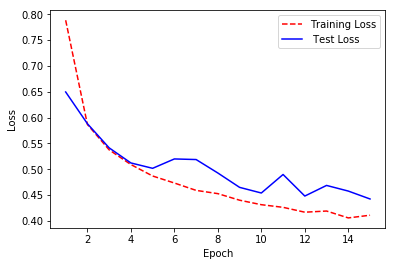

In [26]:
import matplotlib.pyplot as plt
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", " Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")


In [3]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

np.random.seed(0)
number_of_features = 1000
(data_train, target_train),(data_test, target_test) = imdb.load_data(num_words=number_of_features)

tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode='binary')
features_test = tokenizer.sequences_to_matrix(data_test, mode='binary')

network = models.Sequential()

network.add(layers.Dense(units=16,
                         activation='relu',
                         input_shape=(number_of_features,)))

network.add(layers.Dense(units=16, 
                         activation="relu"))

network.add(layers.Dense(units=1, activation="sigmoid"))

network.compile(loss="binary_crossentropy",
               optimizer="rmsprop",
               metrics=["accuracy"])

callbacks = [EarlyStopping(monitor ="val_loss",patience=2),
            ModelCheckpoint(filepath="best_model.h5",
                           monitor="val_loss",
                           save_best_only=True)]

history = network.fit(features_train,
                     target_train,
                     epochs = 20,
                     verbose= 0,
                     callbacks=callbacks,
                     batch_size=100,
                     validation_data=(features_test, target_test))


Instructions for updating:
Use tf.cast instead.


<module 'matplotlib.pyplot' from 'C:\\Users\\fujii\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\matplotlib\\pyplot.py'>

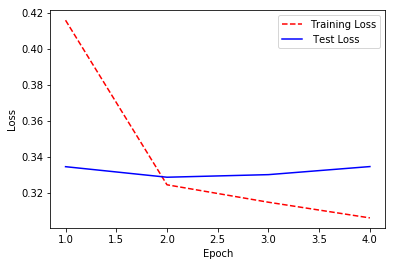

In [6]:
import matplotlib.pyplot as plt
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", " Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt

In [10]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint

np.random.seed(0)
number_of_features = 1000
(data_train, target_train),(data_test, target_test) = imdb.load_data(num_words=number_of_features)

tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode='binary')
features_test = tokenizer.sequences_to_matrix(data_test, mode='binary')

network = models.Sequential()
network.add(layers.Dropout(0.2, input_shape=(number_of_features,)))
network.add(layers.Dense(units=16,
                         activation='relu'))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(units=16, 
                         activation="relu"))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(units=1, activation="sigmoid"))

network.compile(loss="binary_crossentropy",
               optimizer="rmsprop",
               metrics=["accuracy"])

checkpoint = [ModelCheckpoint(filepath="models.hdf5")]

history = network.fit(features_train,
                     target_train,
                     epochs = 3,
                      callbacks=checkpoint,
                     verbose= 0,
                     batch_size=100,
                     validation_data=(features_test, target_test))


In [13]:
import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

np.random.seed(0)
number_of_features = 1000
features, target = make_classification(n_samples=10000,
                                      n_features= number_of_features,
                                      n_informative=3,
                                      n_redundant=0,
                                      n_classes=2,
                                      weights=[.5,.5],
                                      random_state=0)

def create_network(optimizer="rmsprop"):
    network = models.Sequential()
    network.add(layers.Dense(units=16,activation='relu',input_shape = (number_of_features,)))
    network.add(layers.Dense(units=16,activation="relu"))
    network.add(layers.Dense(units=1, activation="sigmoid"))
    network.compile(loss="binary_crossentropy",
                   optimizer="rmsprop",
                   metrics=["accuracy"])
    return network

neural_network = KerasClassifier(build_fn=create_network,verbose=0)

epochs = [5,10]
batches=[5,10,100]
optimizers = ["rmsprop", "adam"]

hyperparameters = dict(optimizer = optimizers, epochs = epochs, batch_size = batches)

grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters)

grid_result = grid.fit(features, target)

In [14]:
grid_result.best_params_

{'batch_size': 5, 'epochs': 10, 'optimizer': 'adam'}

In [27]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

K.set_image_data_format("channels_first")

np.random.seed(0)

channels= 1
height = 28
width = 28

(data_train, target_train),(data_test, target_test) = mnist.load_data()

data_train = data_train.reshape(data_train.shape[0], channels, height,width)
data_test = data_test.reshape(data_test.shape[0], channels, height,width)

features_train = data_train / 255
features_test = data_test / 255

target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]

network = Sequential()

network.add(Conv2D(filters=64,
                  kernel_size=(5,5),
                  input_shape=(channels,width,height),
                  activation='relu'))

network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.5))
network.add(Flatten())
network.add(Dense(128,activation="relu"))
network.add(Dropout(0.5))
network.add(Dense(number_of_classes, activation="softmax"))

network.compile(loss="categorical_crossentropy",
                   optimizer="rmsprop",
                   metrics=["accuracy"])
network.fit(features_train,
            target_train,
            epochs = 2,
            verbose = 0, 
            batch_size=1000,
            validation_data=(features_test, target_test))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

augmentation = ImageDataGenerator(featurewise_center = True,
                                 zoom_range = 0.3,
                                 width_shift_range = 0.2,
                                 horizontal_flip=True,
                                 rotation_range=90)

augment_images = augmentation.flow_from_directory("raw/images",
                                                 batch_size=32,
                                                 class_mode="binary",
                                                 save_to_dir="processed/image")

In [30]:
from keras.preprocessing import sequence

np.random.seed(0)

number_of_features = 1000
(data_train, target_train),(data_test, target_test) = imdb.load_data(num_words=number_of_features)

features_train = sequence.pad_sequences(data_train, maxlen=400)
features_test = sequence.pad_sequences(data_test, maxlen=400)

network = models.Sequential()

network.add(layers.Embedding(input_dim=number_of_features,output_dim=128))

network.add(layers.LSTM(units=128))

network.add(layers.Dense(units=1,activation="sigmoid"))

network.compile(loss="binary_crossentropy",
                   optimizer="Adam",
                   metrics=["accuracy"])
network.fit(features_train,
            target_train,
            epochs = 3,
            verbose = 0, 
            batch_size=1000,
            validation_data=(features_test, target_test))